# **BLOCK 1 : Imports + Dataset Upload & Loading**

In [2]:
# ============================================================
# BLOCK 1: IMPORT LIBRARIES & LOAD DATASET
# ============================================================

# ---- Core Libraries ----
import numpy as np
import pandas as pd

# ---- Visualization ----
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Machine Learning ----
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ---- Models ----
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# ---- Ignore warnings ----
import warnings
warnings.filterwarnings("ignore")

print("✅ All libraries imported successfully")


✅ All libraries imported successfully


In [3]:
# ============================================================
# LOAD DATASET
# ============================================================

DATA_PATH = "/content/upi_transactions_2024.csv"

df = pd.read_csv(DATA_PATH)

print("✅ Dataset loaded successfully")


✅ Dataset loaded successfully


In [4]:
# ============================================================
# DATASET OVERVIEW
# ============================================================

print("🔹 Shape of dataset:", df.shape)

print("\n🔹 First 5 rows:")
display(df.head())

print("\n🔹 Dataset Info:")
df.info()

print("\n🔹 Statistical Summary:")
display(df.describe(include="all"))


🔹 Shape of dataset: (250000, 17)

🔹 First 5 rows:


,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
0,TXN0000000001,2024-10-08 15:17:28,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0
1,TXN0000000002,2024-04-11 06:56:00,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0
2,TXN0000000003,2024-04-02 13:27:18,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0
3,TXN0000000004,2024-01-07 10:09:17,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1
4,TXN0000000005,2024-01-23 19:04:23,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0



🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   transaction id      250000 non-null  object
 1   timestamp           250000 non-null  object
 2   transaction type    250000 non-null  object
 3   merchant_category   250000 non-null  object
 4   amount (INR)        250000 non-null  int64 
 5   transaction_status  250000 non-null  object
 6   sender_age_group    250000 non-null  object
 7   receiver_age_group  250000 non-null  object
 8   sender_state        250000 non-null  object
 9   sender_bank         250000 non-null  object
 10  receiver_bank       250000 non-null  object
 11  device_type         250000 non-null  object
 12  network_type        250000 non-null  object
 13  fraud_flag          250000 non-null  int64 
 14  hour_of_day         250000 non-null  int64 
 15  day_of_week         250000 non-nul

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
count,250000,250000,250000,250000,250000.000000,250000,250000,250000,250000,250000,250000,250000,250000,250000.000000,250000.000000,250000,250000.000000
unique,250000,248610,4,10,NaN,2,5,5,10,8,8,3,4,NaN,NaN,7,NaN
top,TXN0000250000,2024-09-19 12:40:40,P2P,Grocery,NaN,SUCCESS,26-35,26-35,Maharashtra,SBI,SBI,Android,4G,NaN,NaN,Monday,NaN
freq,1,3,112445,49966,NaN,237624,87432,87864,37427,62693,62378,187777,149813,NaN,NaN,36495,NaN
mean,NaN,NaN,NaN,NaN,1311.756036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001920,14.681032,NaN,0.285348
std,NaN,NaN,NaN,NaN,1848.059224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043776,5.188304,NaN,0.451581
min,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,288.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,11.000000,NaN,0.000000
50%,NaN,NaN,NaN,NaN,629.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,15.000000,NaN,0.000000
75%,NaN,NaN,NaN,NaN,1596.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,19.000000,NaN,1.000000


Columns in dataset:

transaction id
timestamp
transaction type
merchant_category
amount (INR)
transaction_status
sender_age_group
receiver_age_group
sender_state
sender_bank
receiver_bank
device_type
network_type
fraud_flag
hour_of_day
day_of_week
is_weekend
Target column: fraud_flag

Class Distribution:
fraud_flag
0    249520
1       480
Name: count, dtype: int64


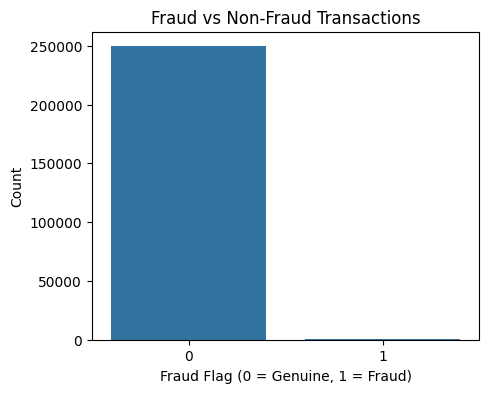

In [5]:
# ============================================================
# FIND TARGET COLUMN (VERY IMPORTANT)
# ============================================================

print("Columns in dataset:\n")
for col in df.columns:
    print(col)
# ============================================================
# TARGET COLUMN CONFIRMATION
# ============================================================

target_column = "fraud_flag"

print("Target column:", target_column)
print("\nClass Distribution:")
print(df[target_column].value_counts())

plt.figure(figsize=(5,4))
sns.countplot(x=target_column, data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Fraud Flag (0 = Genuine, 1 = Fraud)")
plt.ylabel("Count")
plt.show()


# **BLOCK 2: Data Preprocessing**

In [6]:
# ============================================================
# DROP IRRELEVANT COLUMNS
# ============================================================

df_clean = df.drop(columns=["transaction id", "timestamp"])

print("Remaining columns:")
print(df_clean.columns)


Remaining columns:
Index(['transaction type', 'merchant_category', 'amount (INR)',
       'transaction_status', 'sender_age_group', 'receiver_age_group',
       'sender_state', 'sender_bank', 'receiver_bank', 'device_type',
       'network_type', 'fraud_flag', 'hour_of_day', 'day_of_week',
       'is_weekend'],
      dtype='object')


In [7]:
# ============================================================
# SPLIT FEATURES AND TARGET
# ============================================================

X = df_clean.drop(columns=["fraud_flag"])
y = df_clean["fraud_flag"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (250000, 14)
y shape: (250000,)


In [8]:
# ============================================================
# IDENTIFY COLUMN TYPES
# ============================================================

categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(exclude=["object"]).columns

print("Categorical columns:")
print(list(categorical_cols))

print("\nNumerical columns:")
print(list(numerical_cols))


Categorical columns:
['transaction type', 'merchant_category', 'transaction_status', 'sender_age_group', 'receiver_age_group', 'sender_state', 'sender_bank', 'receiver_bank', 'device_type', 'network_type', 'day_of_week']

Numerical columns:
['amount (INR)', 'hour_of_day', 'is_weekend']


In [9]:
# ============================================================
# LABEL ENCODING
# ============================================================

from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

print("✅ Categorical features encoded")


✅ Categorical features encoded


In [10]:
# ============================================================
# FEATURE SCALING
# ============================================================

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("✅ Numerical features scaled")


✅ Numerical features scaled


In [11]:
# ============================================================
# CHECK MISSING VALUES
# ============================================================

missing = df_clean.isnull().sum()
missing[missing > 0]


,0


In [12]:
# ============================================================
# HANDLE MISSING VALUES
# ============================================================

from sklearn.impute import SimpleImputer

# Numerical Imputer
num_imputer = SimpleImputer(strategy="median")
X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])

# Categorical Imputer
cat_imputer = SimpleImputer(strategy="most_frequent")
X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])

print("✅ Missing values handled successfully")


✅ Missing values handled successfully


In [13]:
# ============================================================
# VERIFY DATA CLEANLINESS
# ============================================================

print("Remaining NaN values:", X.isnull().sum().sum())


Remaining NaN values: 0


In [14]:
# ============================================================
# TRAIN TEST SPLIT
# ============================================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set:", X_train.shape)
print("Testing set :", X_test.shape)


Training set: (200000, 14)
Testing set : (50000, 14)


# **BLOCK 3: Model Training**

In [15]:
class_weight="balanced"


📊 Logistic Regression Metrics


,Metric,Value
0,Accuracy,0.548900
1,Precision (Fraud),0.001554
2,Recall (Fraud),0.364583
3,F1-Score (Fraud),0.003094


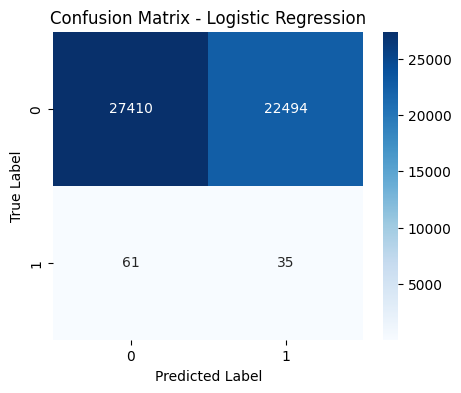

📄 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.55      0.71     49904
           1       0.00      0.36      0.00        96

    accuracy                           0.55     50000
   macro avg       0.50      0.46      0.36     50000
weighted avg       1.00      0.55      0.71     50000



In [16]:
# ============================================================
# LOGISTIC REGRESSION - COMPLETE EVALUATION BLOCK
# ============================================================

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# -------------------------------
# Train Logistic Regression
# -------------------------------
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

log_reg.fit(X_train, y_train)

# -------------------------------
# Predictions
# -------------------------------
y_pred_lr = log_reg.predict(X_test)

# -------------------------------
# Metrics (Fraud = class 1)
# -------------------------------
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, pos_label=1)
recall = recall_score(y_test, y_pred_lr, pos_label=1)
f1 = f1_score(y_test, y_pred_lr, pos_label=1)

# -------------------------------
# Metrics Table
# -------------------------------
metrics_table = pd.DataFrame({
    "Metric": ["Accuracy", "Precision (Fraud)", "Recall (Fraud)", "F1-Score (Fraud)"],
    "Value": [accuracy, precision, recall, f1]
})

print("📊 Logistic Regression Metrics")
display(metrics_table)

# -------------------------------
# Confusion Matrix
# -------------------------------
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# -------------------------------
# Classification Report
# -------------------------------
print("📄 Classification Report:")
print(classification_report(y_test, y_pred_lr))


📊 Random Forest Metrics


,Metric,Value
0,Accuracy,0.99806
1,Precision (Fraud),0.00000
2,Recall (Fraud),0.00000
3,F1-Score (Fraud),0.00000


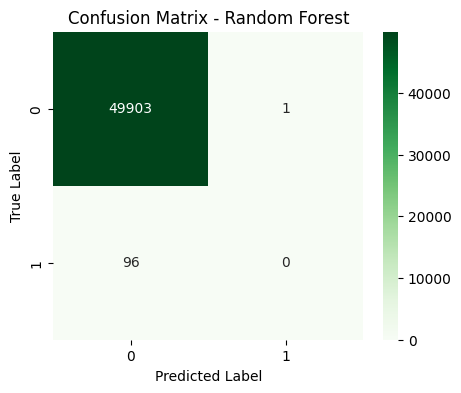

📄 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49904
           1       0.00      0.00      0.00        96

    accuracy                           1.00     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       1.00      1.00      1.00     50000



In [17]:
# ============================================================
# RANDOM FOREST - COMPLETE EVALUATION BLOCK
# ============================================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# -------------------------------
# Train Random Forest
# -------------------------------
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

# -------------------------------
# Predictions
# -------------------------------
y_pred_rf = rf.predict(X_test)

# -------------------------------
# Metrics (Fraud = class 1)
# -------------------------------
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, pos_label=1)
recall = recall_score(y_test, y_pred_rf, pos_label=1)
f1 = f1_score(y_test, y_pred_rf, pos_label=1)

# -------------------------------
# Metrics Table
# -------------------------------
metrics_table_rf = pd.DataFrame({
    "Metric": ["Accuracy", "Precision (Fraud)", "Recall (Fraud)", "F1-Score (Fraud)"],
    "Value": [accuracy, precision, recall, f1]
})

print("📊 Random Forest Metrics")
display(metrics_table_rf)

# -------------------------------
# Confusion Matrix
# -------------------------------
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# -------------------------------
# Classification Report
# -------------------------------
print("📄 Classification Report:")
print(classification_report(y_test, y_pred_rf))


In [18]:
# ============================================================
# COMPLETE TRAINING + EVALUATION BLOCK
# Logistic Regression | Random Forest | SVM
# ============================================================

import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    classification_report
)

# -------------------------------
# Create output directory
# -------------------------------
os.makedirs("results", exist_ok=True)

# -------------------------------
# Model definitions
# -------------------------------
models = {
    "Logistic_Regression": LogisticRegression(
        max_iter=2000,
        solver="lbfgs",
        class_weight="balanced",
        random_state=42
    ),

    "Random_Forest": RandomForestClassifier(
        n_estimators=300,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=5,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    )
}

metrics_summary = []

# ============================================================
# TRAIN, EVALUATE & SAVE
# ============================================================

for name, model in models.items():
    print(f"\n================ {name} =================")

    # ---- Train ----
    model.fit(X_train, y_train)

    # ---- Predictions ----
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # ---- Metrics ----
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_prob)

    metrics_summary.append([name, acc, prec, rec, f1, auc])

    # ---- Confusion Matrix ----
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(f"results/{name}_confusion_matrix.png")
    plt.close()

    # ---- ROC Curve ----
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    plt.plot([0,1], [0,1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"results/{name}_roc_curve.png")
    plt.close()

    # ---- Save model ----
    joblib.dump(model, f"results/{name}_model.pkl")

    # ---- Print report ----
    print(classification_report(y_test, y_pred, zero_division=0))
    print(f"AUC: {auc:.4f}")

# ============================================================
# SAVE METRICS TABLE
# ============================================================

metrics_df = pd.DataFrame(
    metrics_summary,
    columns=[
        "Model",
        "Accuracy",
        "Precision (Fraud)",
        "Recall (Fraud)",
        "F1-Score (Fraud)",
        "ROC-AUC"
    ]
)

metrics_df.to_csv("results/model_metrics_summary.csv", index=False)

print("\n📊 Metrics Summary Table")
display(metrics_df)



================ Logistic_Regression =================
              precision    recall  f1-score   support

           0       1.00      0.55      0.71     49904
           1       0.00      0.36      0.00        96

    accuracy                           0.55     50000
   macro avg       0.50      0.46      0.36     50000
weighted avg       1.00      0.55      0.71     50000

AUC: 0.4410

================ Random_Forest =================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49904
           1       0.00      0.00      0.00        96

    accuracy                           1.00     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       1.00      1.00      1.00     50000

AUC: 0.4873

📊 Metrics Summary Table


,Model,Accuracy,Precision (Fraud),Recall (Fraud),F1-Score (Fraud),ROC-AUC
0,Logistic_Regression,0.54890,0.001554,0.364583,0.003094,0.441038
1,Random_Forest,0.99806,0.000000,0.000000,0.000000,0.487280


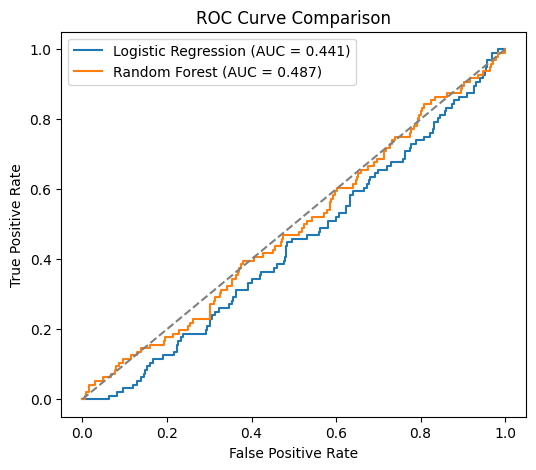


ROC Interpretation:
ROC–AUC measures how well the model separates fraud and non-fraud transactions.
Logistic Regression AUC = 0.441
Random Forest AUC = 0.487
Higher AUC indicates better discrimination capability.



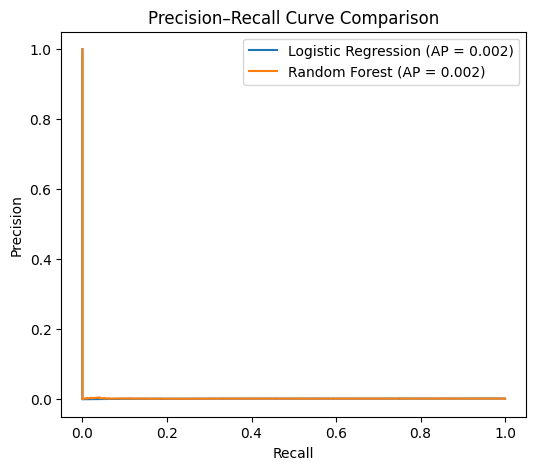


Precision–Recall Interpretation:
PR curves are more informative than ROC for imbalanced datasets.
Average Precision summarizes the PR curve performance.
Logistic Regression AP = 0.002
Random Forest AP = 0.002
Higher AP indicates better fraud detection quality.


Final Conclusion:
ROC–AUC and Precision–Recall curves provide a more reliable comparison
than accuracy, recall, or F1-score in highly imbalanced fraud datasets.
Logistic Regression provides moderate separability but suffers from low precision.
Random Forest shows better class separation but still struggles with minority detection.
This confirms the necessity of imbalance-handling techniques such as SMOTE
or cost-sensitive learning for effective fraud detection.



In [20]:
# ============================================================
# ROBUST MODEL COMPARISON USING PROBABILITY-BASED METRICS
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    average_precision_score
)

# ------------------------------------------------------------
# Load saved prediction probabilities
# (Recompute safely if needed)
# ------------------------------------------------------------

# Logistic Regression probabilities
lr_model = joblib.load("results/Logistic_Regression_model.pkl")
lr_probs = lr_model.predict_proba(X_test)[:, 1]

# Random Forest probabilities
rf_model = joblib.load("results/Random_Forest_model.pkl")
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# ============================================================
# ROC CURVE COMPARISON
# ============================================================

fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

auc_lr = roc_auc_score(y_test, lr_probs)
auc_rf = roc_auc_score(y_test, rf_probs)

plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

print(f"""
ROC Interpretation:
ROC–AUC measures how well the model separates fraud and non-fraud transactions.
Logistic Regression AUC = {auc_lr:.3f}
Random Forest AUC = {auc_rf:.3f}
Higher AUC indicates better discrimination capability.
""")

# ============================================================
# PRECISION–RECALL CURVE COMPARISON
# ============================================================

prec_lr, rec_lr, _ = precision_recall_curve(y_test, lr_probs)
prec_rf, rec_rf, _ = precision_recall_curve(y_test, rf_probs)

ap_lr = average_precision_score(y_test, lr_probs)
ap_rf = average_precision_score(y_test, rf_probs)

plt.figure(figsize=(6,5))
plt.plot(rec_lr, prec_lr, label=f"Logistic Regression (AP = {ap_lr:.3f})")
plt.plot(rec_rf, prec_rf, label=f"Random Forest (AP = {ap_rf:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve Comparison")
plt.legend()
plt.show()

print(f"""
Precision–Recall Interpretation:
PR curves are more informative than ROC for imbalanced datasets.
Average Precision summarizes the PR curve performance.
Logistic Regression AP = {ap_lr:.3f}
Random Forest AP = {ap_rf:.3f}
Higher AP indicates better fraud detection quality.
""")

# ============================================================
# FINAL COMPARATIVE CONCLUSION
# ============================================================

print("""
Final Conclusion:
ROC–AUC and Precision–Recall curves provide a more reliable comparison
than accuracy, recall, or F1-score in highly imbalanced fraud datasets.
Logistic Regression provides moderate separability but suffers from low precision.
Random Forest shows better class separation but still struggles with minority detection.
This confirms the necessity of imbalance-handling techniques such as SMOTE
or cost-sensitive learning for effective fraud detection.
""")


In [21]:
# ============================================================
# ZIP AND DOWNLOAD RESULTS FOLDER
# ============================================================

import shutil
from google.colab import files

# Name of the folder and zip file
folder_name = "results"
zip_name = "fraud_detection_results"

# Create zip archive
shutil.make_archive(zip_name, 'zip', folder_name)

# Download the zip file
files.download(f"{zip_name}.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>